# Analysis of Road File

### Description

This data is an aggregated view of the more granular dataset. 


### Files
1. AirView_DublinCity_RoadData_ugm3.shp
2. AirView_DublinCity_RoadData_ugm3.prj
3. AirView_DublinCity_RoadData_ugm3.shx
4. AirView_DublinCity_RoadData_ugm3.shx

### Descriptions
```
road_id      unique road segment ID
the_geom     road segment linestring
osm_id       OSM road ID
osm_code     OSM code
osm_fclass   OSM fclass / road-type
osm_name     OSM road name
osm_ref      OSM road ref
osm_oneway   OSM road metadata
osm_maxspeed OSM road metadata
osm_layer    OSM road metadata
osm_bridge   OSM road metadata
osm_tunnel   OSM road metadata
NO2points    number of measurements on this road segment
NO2drives    number of drive passes on this road segment
NO2_ugm3     NO2 concentration (median of drive pass mean) in Âµg/m3
NOpoints     number of measurements on this road segment
NOdrives     number of drive passes on this road segment
NO_ugm3      NO concentration (median of drive pass mean) in Âµg/m3
CO2points    number of measurements on this road segment
CO2drives    number of drive passes on this road segment
CO2_mgm3     CO2 concentration (median of drive pass mean) in mg/m3
COpoints     number of measurements on this road segment
COdrives     number of drive passes on this road segment
CO_mgm3      CO concentration (median of drive pass mean) in mg/m3
O3points     number of measurements on this road segment
O3drives     number of drive passes on this road segment
O3_ugm3      O3 concentration (median of drive pass mean) in Âµg/m3
PM25points   number of measurements on this road segment
PM25drives   number of drive passes on this road segment
PM25_ugm3    PM2.5 concentration (median of drive pass mean) in Âµg/m3
```

### Important Points
- Different prototypes tested for product failures
- Given product attributes and measurement values, so only 2 types of attributes
- The simulated test uses loading
- You must predict individual product failures of new new codes with their lab test results

## Package Importing

In [3]:
# general python libraries
import time
import sys
import datetime
import math
import numpy as np

# dataframe and data manipulation library
import pandas as pd

# visualisation and EDA libraries
import matplotlib.pyplot as  plt
import pandas_profiling
import seaborn as sns

# machine learning libraries
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn import metrics

In [6]:
import geopandas as gpd

In [7]:
%matplotlib inline

## Data Importing

In [8]:
# specify name of file
#dataset_name = 'airview_dublincity_measurements_ugm3'
dataset_name = 'airview_dublincity_roaddata_ugm3'


folder_path = f'../data/raw/{dataset_name}'
shapefile_path = f'{folder_path}/{dataset_name}.shp'

In [9]:
# read in shapefile
gdf = gpd.read_file(shapefile_path)
gdf.head(5)

ERROR 1: PROJ: proj_create_from_database: Open of /opt/conda/share/proj failed


road_id     osm_id osm_code osm_fclass osm_name osm_ref osm_oneway  \
0  3633278  497788125     5141    service     None    None          B   
1  3639035  500417276     5141    service     None    None          B   
2  2099409  236680313     5141    service     None    None          B   
3  3636088  498987932     5141    service     None    None          B   
4  3962473  684445633     5141    service     None    None          B   

  osm_maxspe osm_layer osm_bridge  ... COpoints  COdrives  CO_mgm3  O3points  \
0         30         0      false  ...        0       NaN      NaN         0   
1          0         0      false  ...        0       NaN      NaN         0   
2          0         0      false  ...        0       NaN      NaN         0   
3          0         0      false  ...        0       NaN      NaN         0   
4          0         0      false  ...        0       NaN      NaN         1   

   O3drives  O3_ugm3  PM25points  PM25drives  PM25_ugm3  \
0       NaN      NaN           2         1.0      3.030   
1       NaN      NaN           1         1.0      5.042   
2       NaN      NaN           1         1.0     32.500   
3       NaN      NaN           1         1.0      6.882   
4       1.0   54.447           1         1.0      7.111   

                                            geometry  
0  LINESTRING (-6.15647 53.39440, -6.15665 53.39408)  
1  LINESTRING (-6.32663 53.34215, -6.32662 53.342...  
2  LINESTRING (-6.18915 53.37956, -6.18953 53.37994)  
3  LINESTRING (-6.27962 53.32629, -6.27965 53.326...  
4  LINESTRING (-6.26444 53.31320, -6.26444 53.313...  

[5 rows x 30 columns]

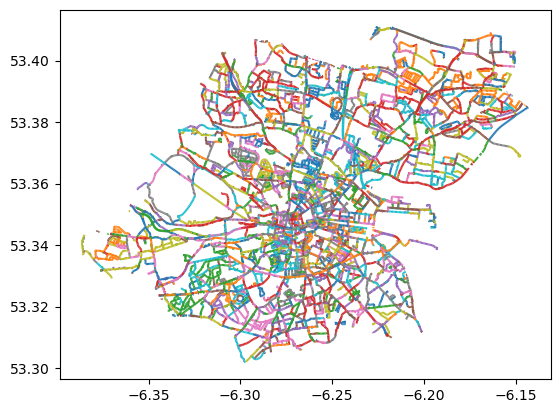

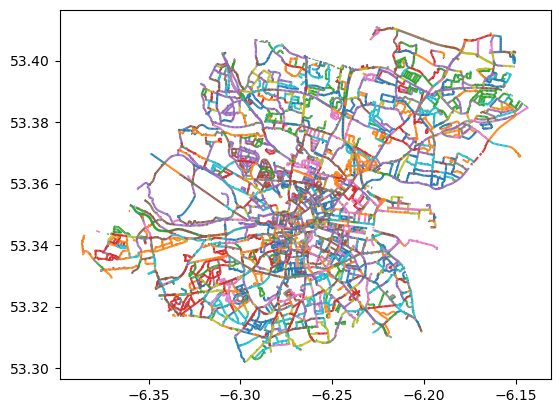

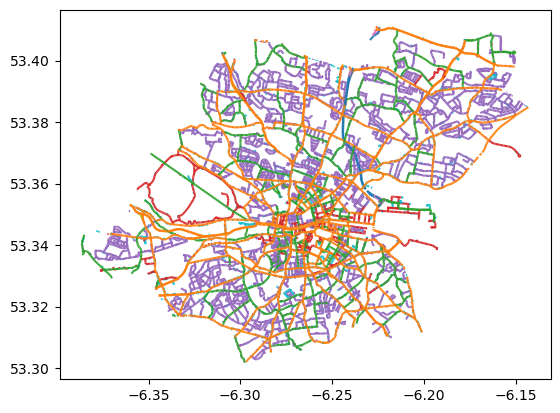

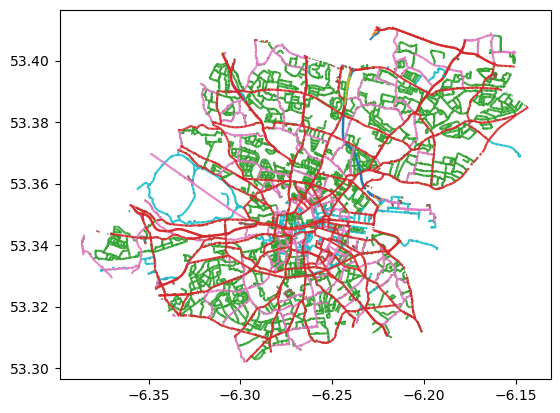

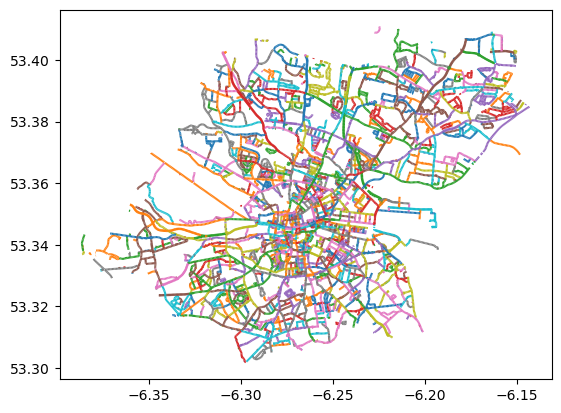

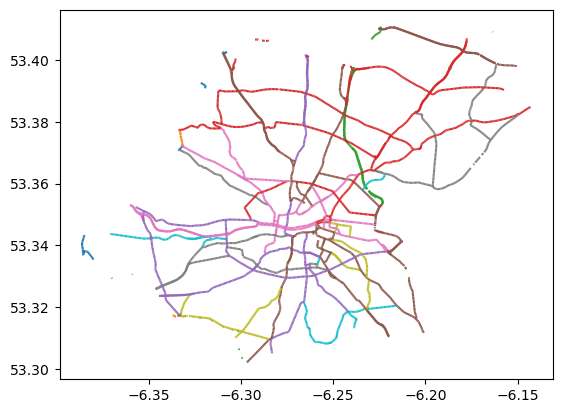

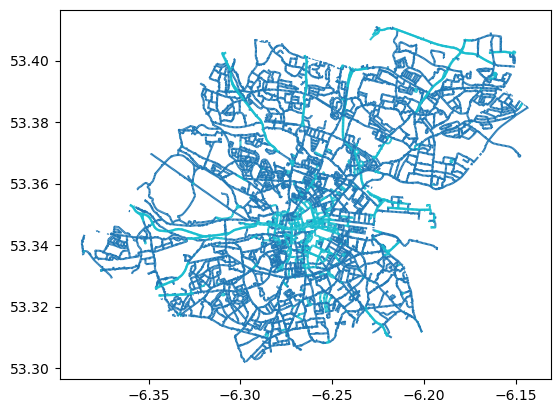

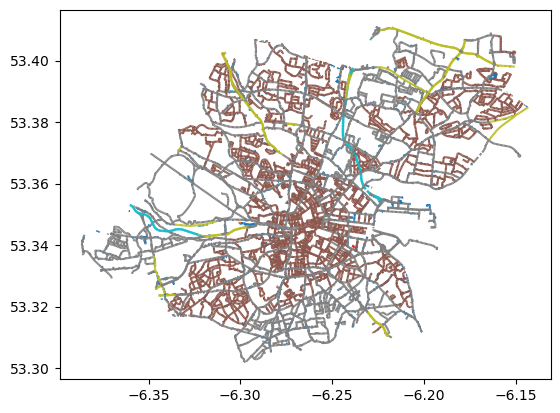

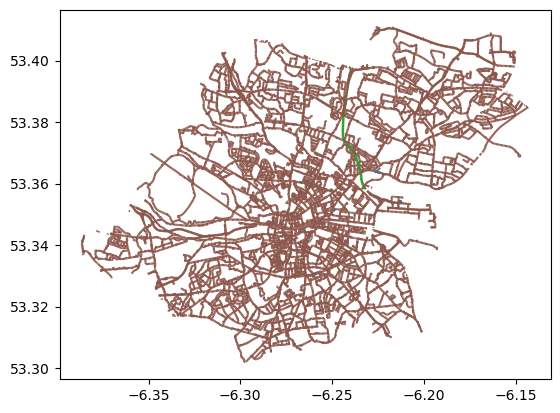

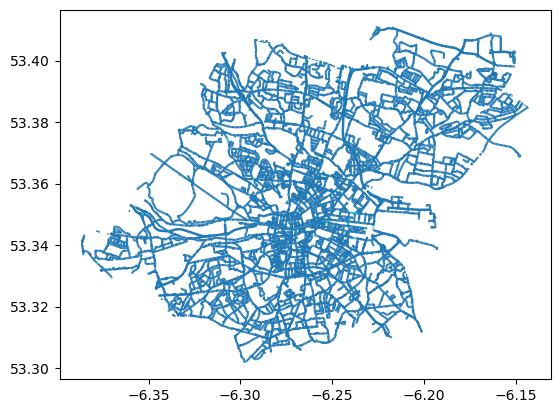

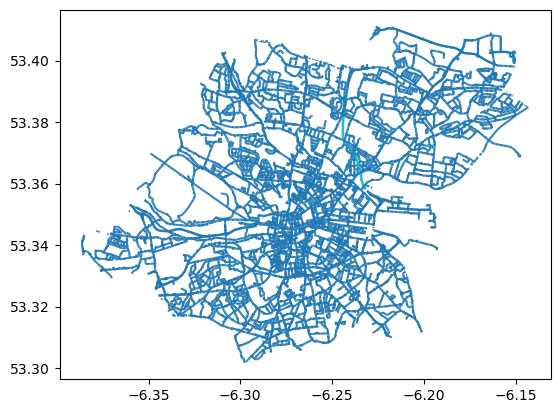

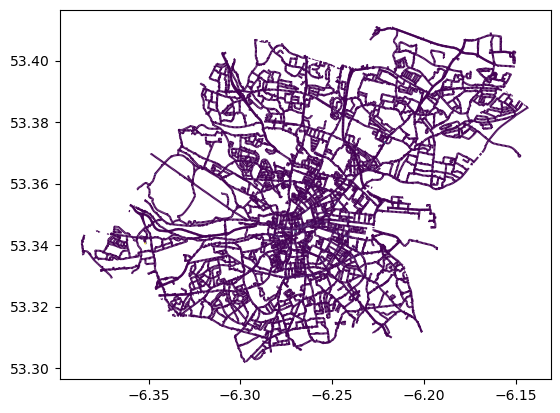

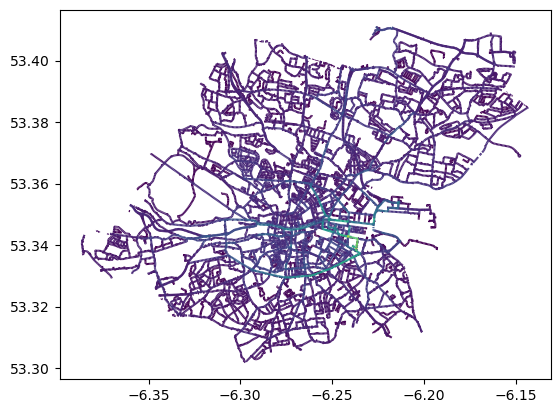

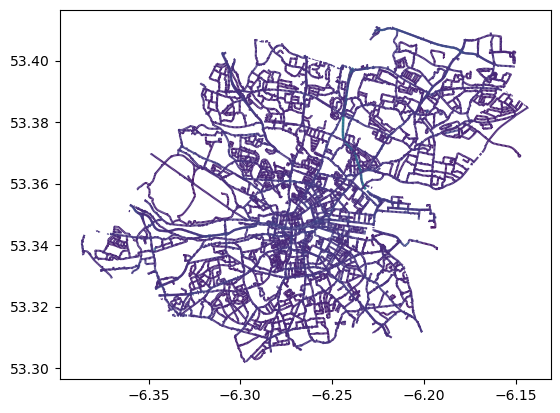

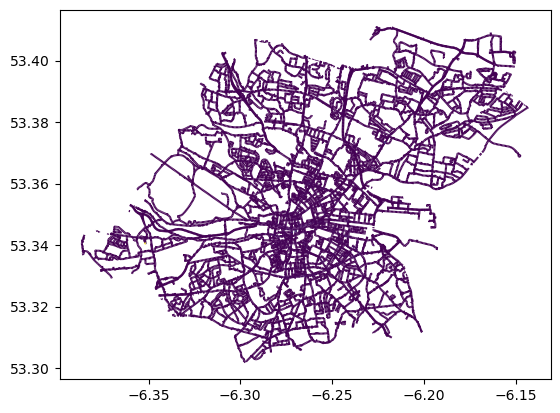

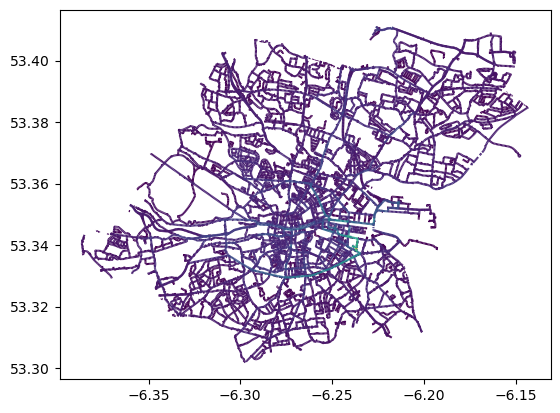

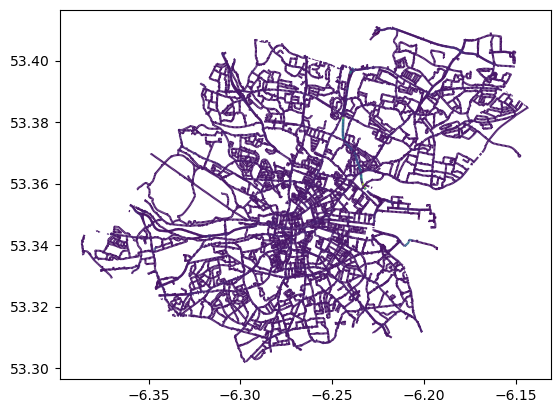

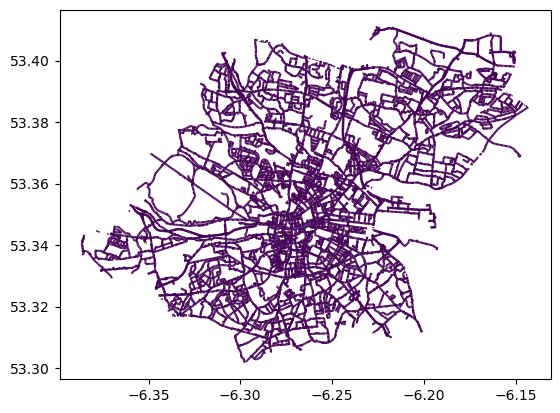

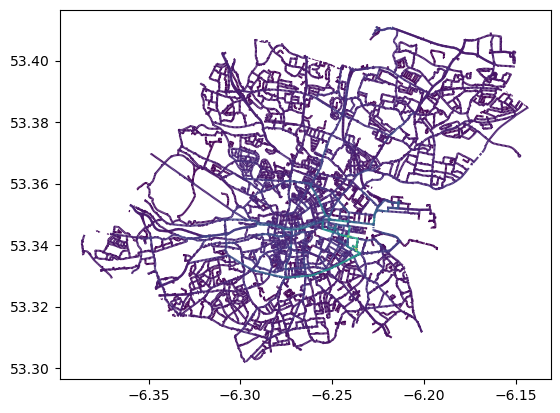

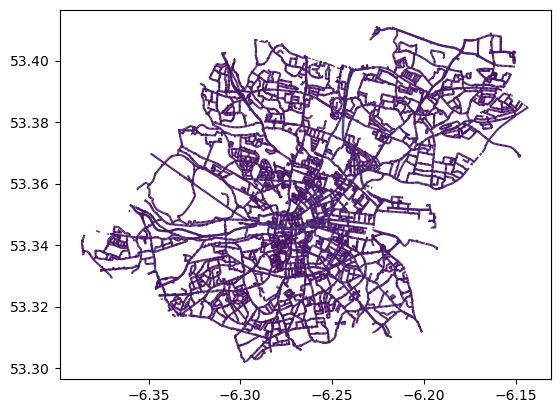

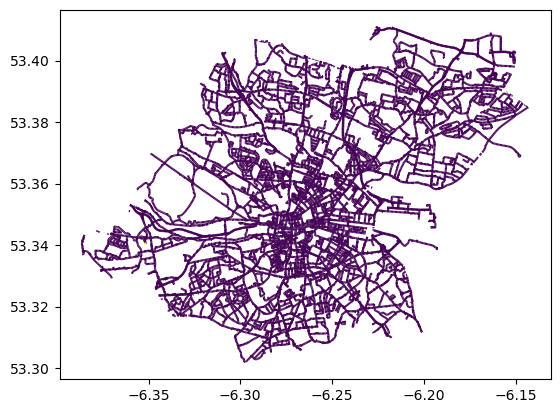

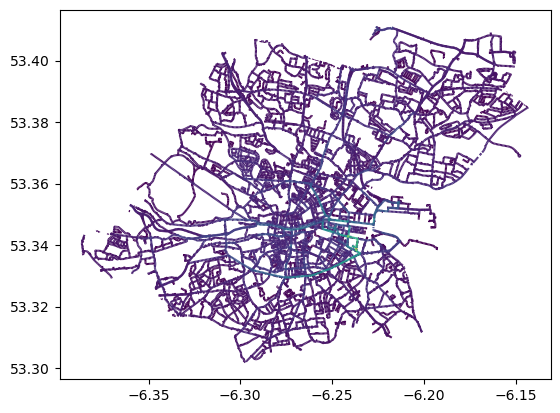

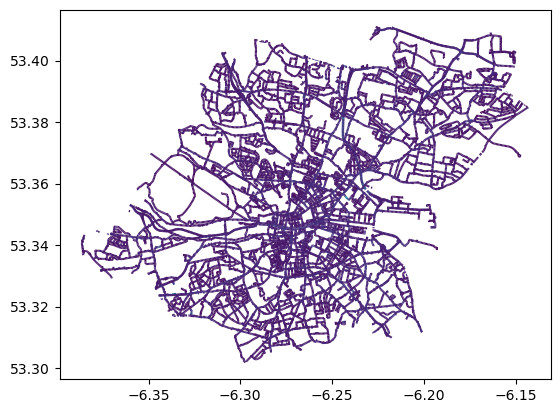

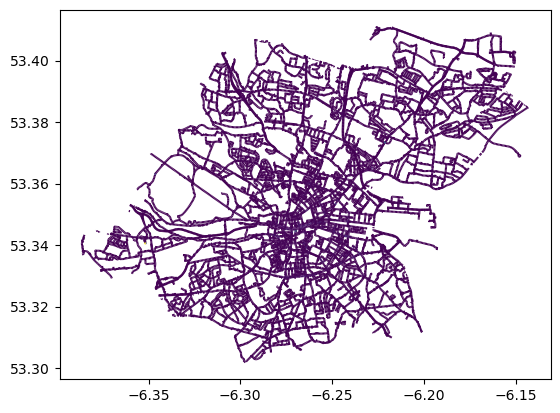

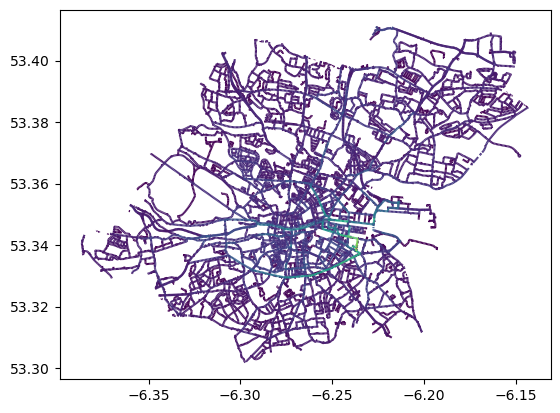

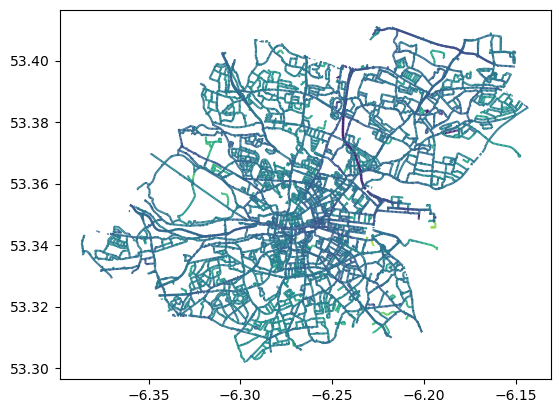

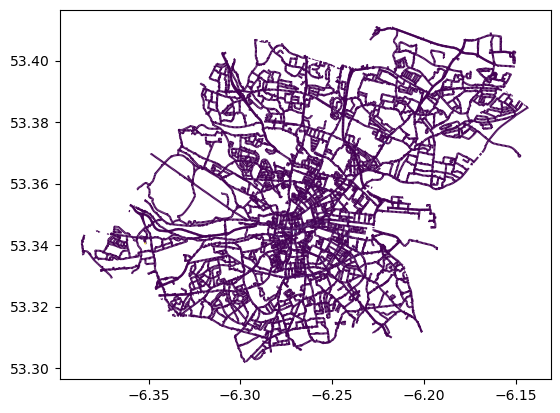

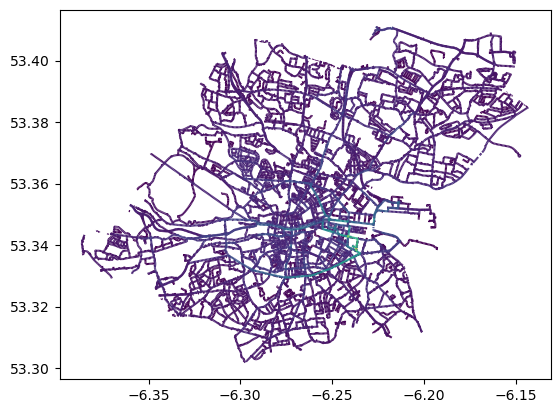

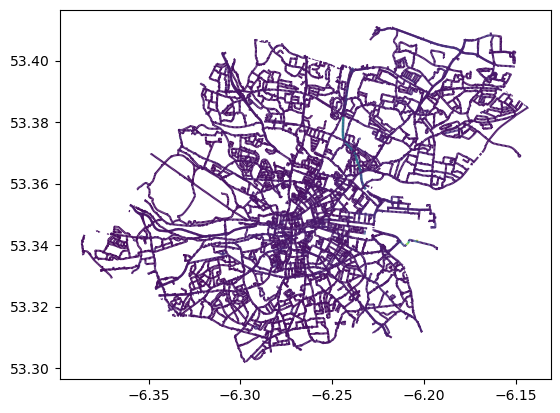

TypeError: unhashable type: 'LineString'

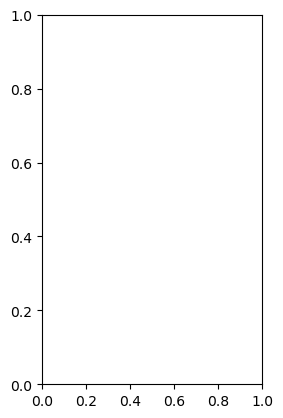

In [15]:
for col in ['']:
    gdf.plot(column=col)
    fig, ax = plt.subplots(1, 1)

    world.plot(column='pop_est', ax=ax, legend=True)

In [12]:
gdf.columns

Index(['road_id', 'osm_id', 'osm_code', 'osm_fclass', 'osm_name', 'osm_ref',
       'osm_oneway', 'osm_maxspe', 'osm_layer', 'osm_bridge', 'osm_tunnel',
       'NO2points', 'NO2drives', 'NO2_ugm3', 'NOpoints', 'NOdrives', 'NO_ugm3',
       'CO2points', 'CO2drives', 'CO2_mgm3', 'COpoints', 'COdrives', 'CO_mgm3',
       'O3points', 'O3drives', 'O3_ugm3', 'PM25points', 'PM25drives',
       'PM25_ugm3', 'geometry'],
      dtype='object')

## Dataset Summaries and Heads

In [20]:
print("Number of rows in train data:    \t",gdf.shape[0])
print("Number of columns in train data: \t",gdf.shape[1])

Number of rows in train data:    	 24694
Number of columns in train data: 	 30


In [21]:
# check datatypes of columns
print(gdf.dtypes.value_counts())

float64     12
object      11
int64        6
geometry     1
dtype: int64


non-numeric column categories based on data from  24694 rows


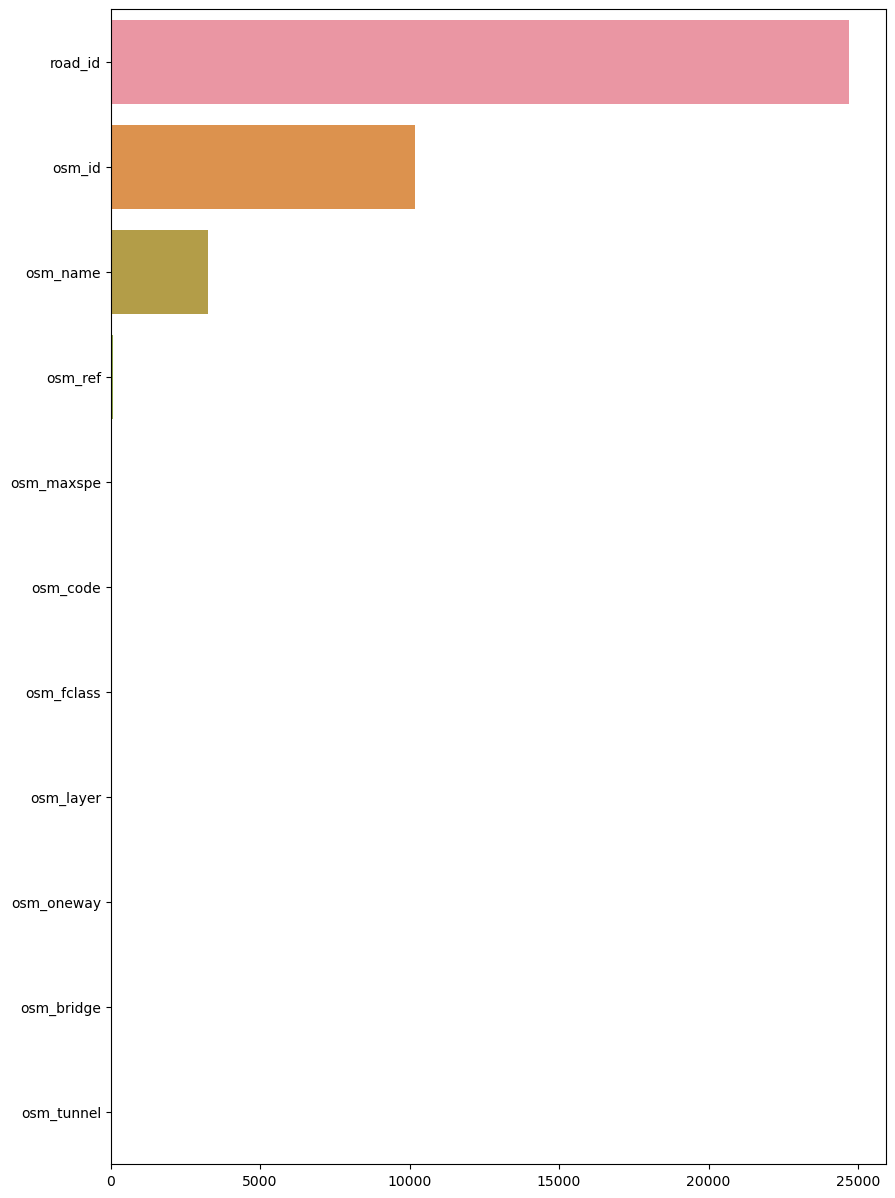

In [22]:
# save names of categorical columns
numeric_cols = gdf.dtypes[gdf.dtypes != "object"].index
cat_cols = gdf.dtypes[gdf.dtypes == "object"].index

# view cardinalitites of categorical columns
print('non-numeric column categories based on data from ', gdf.shape[0],'rows')

cat_name = []
nunique_vals = []
for i in cat_cols:
    cat_name.append(i)
    nunique_vals.append(gdf.loc[:,i].nunique())

cat_counts = pd.Series(data=nunique_vals,index=cat_name).sort_values(ascending = False)

fig = plt.figure(figsize=(10,15))
ax = sns.barplot(y = cat_counts.index, x = cat_counts, orient='h')

In [23]:
# checking missing data
total = gdf.isnull().sum().sort_values(ascending = False)
percent = (gdf.isnull().sum()/gdf.isnull().count()*100).sort_values(ascending = False)
missing_gdf  = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_gdf

Total    Percent
osm_ref     18279  74.022030
osm_name     4485  18.162307
O3drives     1248   5.053859
O3_ugm3      1248   5.053859
CO2drives     205   0.830161
CO2_mgm3      205   0.830161
NO2_ugm3      199   0.805864
NO2drives     199   0.805864
NOdrives       84   0.340164
NO_ugm3        84   0.340164
CO_mgm3        46   0.186280
COdrives       46   0.186280
PM25drives     18   0.072892
PM25_ugm3      18   0.072892
O3points        0   0.000000
PM25points      0   0.000000
COpoints        0   0.000000
road_id         0   0.000000
CO2points       0   0.000000
osm_id          0   0.000000
NOpoints        0   0.000000
NO2points       0   0.000000
osm_tunnel      0   0.000000
osm_bridge      0   0.000000
osm_layer       0   0.000000
osm_maxspe      0   0.000000
osm_oneway      0   0.000000
osm_fclass      0   0.000000
osm_code        0   0.000000
geometry        0   0.000000

## Distributional drift and comparisons

In [24]:
gdf.columns

Index(['road_id', 'osm_id', 'osm_code', 'osm_fclass', 'osm_name', 'osm_ref',
       'osm_oneway', 'osm_maxspe', 'osm_layer', 'osm_bridge', 'osm_tunnel',
       'NO2points', 'NO2drives', 'NO2_ugm3', 'NOpoints', 'NOdrives', 'NO_ugm3',
       'CO2points', 'CO2drives', 'CO2_mgm3', 'COpoints', 'COdrives', 'CO_mgm3',
       'O3points', 'O3drives', 'O3_ugm3', 'PM25points', 'PM25drives',
       'PM25_ugm3', 'geometry'],
      dtype='object')

each of the products could have very different behaviours and be from different populations. And so it may make sense to look at each on of these individually

## Static Profiling

In [27]:
# create minimal report in reports
minimal_report = gdf.profile_report(title="Minimal Report",minimal=True)
minimal_report.to_file("../reports/pp_eda_minimal.html")
#minimal_report.to_notebook_iframe()

AttributeError: 'GeoDataFrame' object has no attribute 'profile_report'

In [ ]:
# set of parameters to create customer report
gdf.profile_report(
    title="Custom Report",
    # create missing/null value diagrams
    # disable if no missing values
    missing_diagrams={
        "heatmap": True,
        "dendrogram": True,
        "bar": True,
        "matrix":True
    # create all correlation plots
    # the correlations and interactions come together
    # the correlations section dictates which corrs will be run
    # the interactions dicatates which variables
    },correlations={
        # strength and directional
        # continuous vars, linear, sensitive to outliers, normal dist
        "pearson": {"calculate": True},
        # strength and directional
        # categorical or quant, linear, no outliers
        "spearman": {"calculate": False},
        # 0-1
        # dependence of 2 vars.
        "kendall": {"calculate": True},
        # no direction, categorical, ordinal, interval
        # non-linear dependency
        # computationally expensive
        "phi_k": {"calculate": True}, # this one is one of the most intensive ones
        # compares 2 categorical vars
        # based on chi-squared test stat
        # sensitive to outlies
        "cramers": {"calculate": True}
    },interactions = {
        # this generates 2d scatter, this will cause crash if too many variables
        "continuous": False
        # comment continouous out and put in 
        # target var to see scatter between
        # only these values and all other
        # values
        #"targets": ['target']
    },html = {
        "style": {"theme":"flatly"}
    }
    
    
).to_file("../reports/pp_eda_custom.html")

## Data Cleaning

Creation of data cleaning function to;
- Impute NULL Values
- Parse Multi-part string columns
- Drop columns
- Encode categorical variables
- Normalise or scale columns

In [26]:
def Preprocessing(df):
    
    df = pd.get_dummies(df) # convert all categorical variables to dummy variables
    
    df = df.dropna(
        # axis = 1 # default both axes, comment out for only 1 axis
    ) # remvoe all na rows or columns
    
    return df

gdf_cleaned = Preprocessing(gdf)

print("missing values present:",gdf_cleaned.isna().sum().sum())
print("categorical columns present:",gdf_cleaned.dtypes[gdf_cleaned.dtypes == "object"].count())



missing values present: 0
categorical columns present: 0


## Model fitting

### Train Test Split

Splitting data into groupings for model fitting

In [15]:
X_train, X_test, y_train, y_test = train_test_split(
    gdf_cleaned.drop(['id','failure'], axis = 1), # X data excluding target variable and any irrelevant id columns
    gdf_cleaned.loc[:,'failure'],
    test_size = 0.2, # 0.2 is a good accepted starting point, with larger data this number can be decreased
    random_state = 42, # random seed, default 42
    shuffle = True # default true, check whether there is population drift over time in default order
)

print("Shape of X_train data:    \t",X_train.shape)
print("Shape of X_test data:    \t",X_test.shape)
print("Shape of y_train data:    \t",y_train.shape)
print("Shape of y_test data:    \t",y_test.shape)

NameError: name 'train_test_split' is not defined

### Linear Regression

In [17]:
from sklearn.linear_model import LinearRegression
# help(LinearRegression)

In [18]:
# initialise new linear regression object model
model = LinearRegression()

In [19]:
# Fir regression model
model.fit(X_train, y_train)

LinearRegression()

In [20]:
# predict values on test set
test_preds = model.predict(X_test)

In [ ]:
test_residuals = y_test - test_preds

# ideally this is normal
sns.scatterplot(x=y_test,y=test_residuals)
plt.axhline(y=0,color='r',ls='--')

In [ ]:
# these coeffients will be in different units
model.coef_

In [ ]:
from joblib import dump, load
dump(model,'../models/linear_regression_model.joblib')